In [1]:
%pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
# Rangos de valores que pueden tomar las variables difusas
food_quality = ctrl.Antecedent(np.arange(0, 11, 1), 'Calidad de los nutrientes')
service_quality = ctrl.Antecedent(np.arange(0, 11, 1), 'Calidad del servicio')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'Propina')

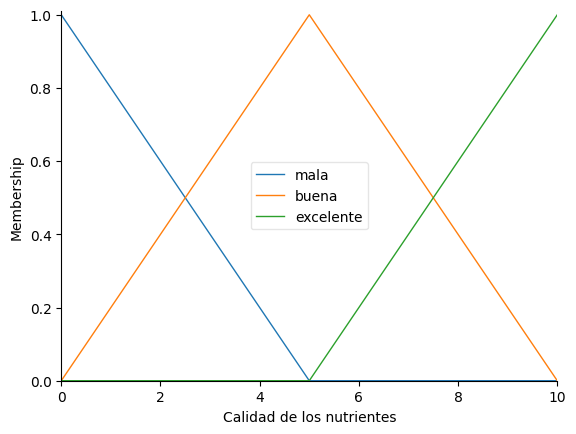

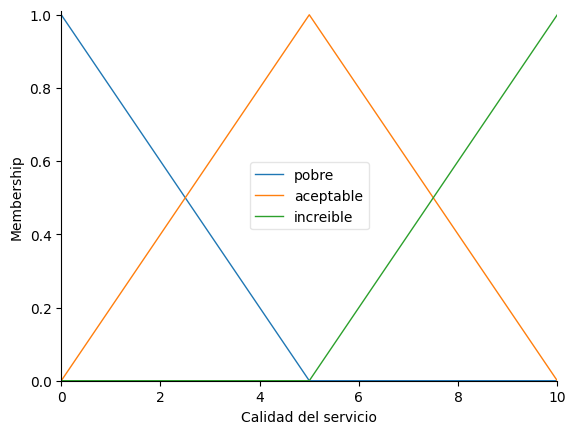

In [ ]:
# Indicar que genere 3 funciones de pertenencia automáticamente para cada antecedente
# con las etiquetas lingüísticas indicadas
food_quality.automf(3, names=['mala', 'buena', 'excelente'])
service_quality.automf(3, names=['pobre', 'aceptable', 'increible'])

food_quality.view()
service_quality.view()

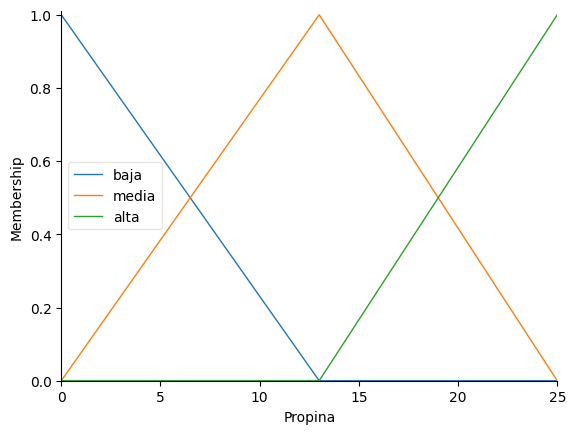

In [ ]:
# Definimos manualmente las funciones de pertenencia utilizando conjuntos
# triangulares para el consecuente
tip['baja'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['media'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['alta'] = fuzz.trimf(tip.universe, [13, 25, 25])

tip.view()

In [ ]:
# Definimos las reglas y las asociamos con el sistema
tiping = ctrl.ControlSystemSimulation(ctrl.ControlSystem([
    ctrl.Rule(food_quality['mala'] | service_quality['pobre'], tip['baja']),
    ctrl.Rule(service_quality['aceptable'], tip['media']),
    ctrl.Rule(food_quality['excelente'] | service_quality['increible'], tip['alta'])
]))

19.847607361963192


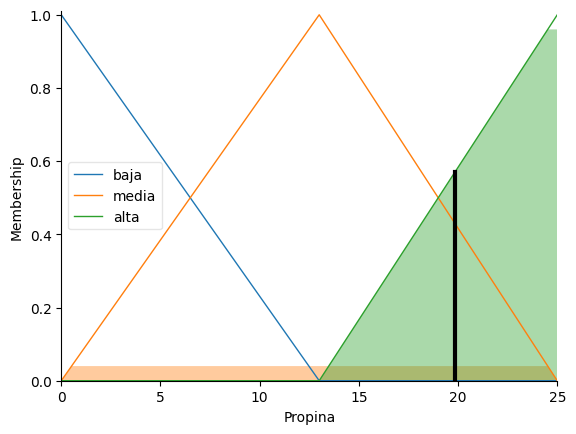

In [ ]:
# Entradas para nuestro problema concreto
tiping.input['Calidad de los nutrientes'] = 6.5
tiping.input['Calidad del servicio'] = 9.8

# Calculamos la propina
tiping.compute()
print(tiping.output['Propina'])
tip.view(sim=tiping)